<a href="https://colab.research.google.com/github/jeevanshrestha/machinelearning/blob/main/Breast_Cancer_Prediction_Classifier_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Breast Cancer Data Analysis and Prediction


#### About Dataset

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

![](https://user-images.githubusercontent.com/36210723/182301443-382b14e1-71c1-46ac-88f5-e72a9b2083e7.jpg)

In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#### Load Required Libraries

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab

In [143]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [144]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast-cancer-data.csv',index_col= 'id')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [146]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [147]:
df.duplicated().sum()

0

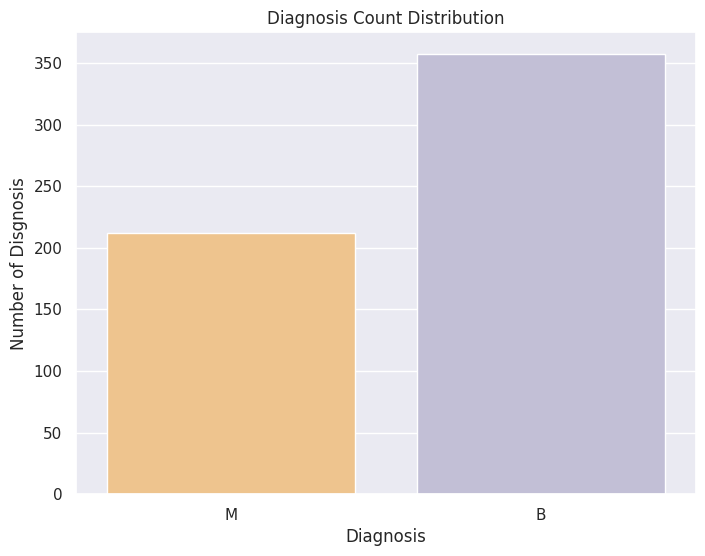

In [148]:
plt.figure(figsize=(8,6))
sns.countplot(df, x='diagnosis', palette='PuOr')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Disgnosis')
plt.title('Diagnosis Count Distribution')
plt.show()

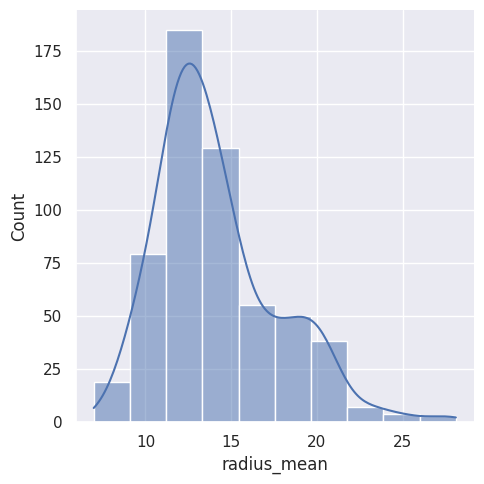

In [149]:
sns.set(rc={"figure.figsize":(6,5)})
sns.displot(df["radius_mean"], kde=True, palette="Pastel1", bins=10)


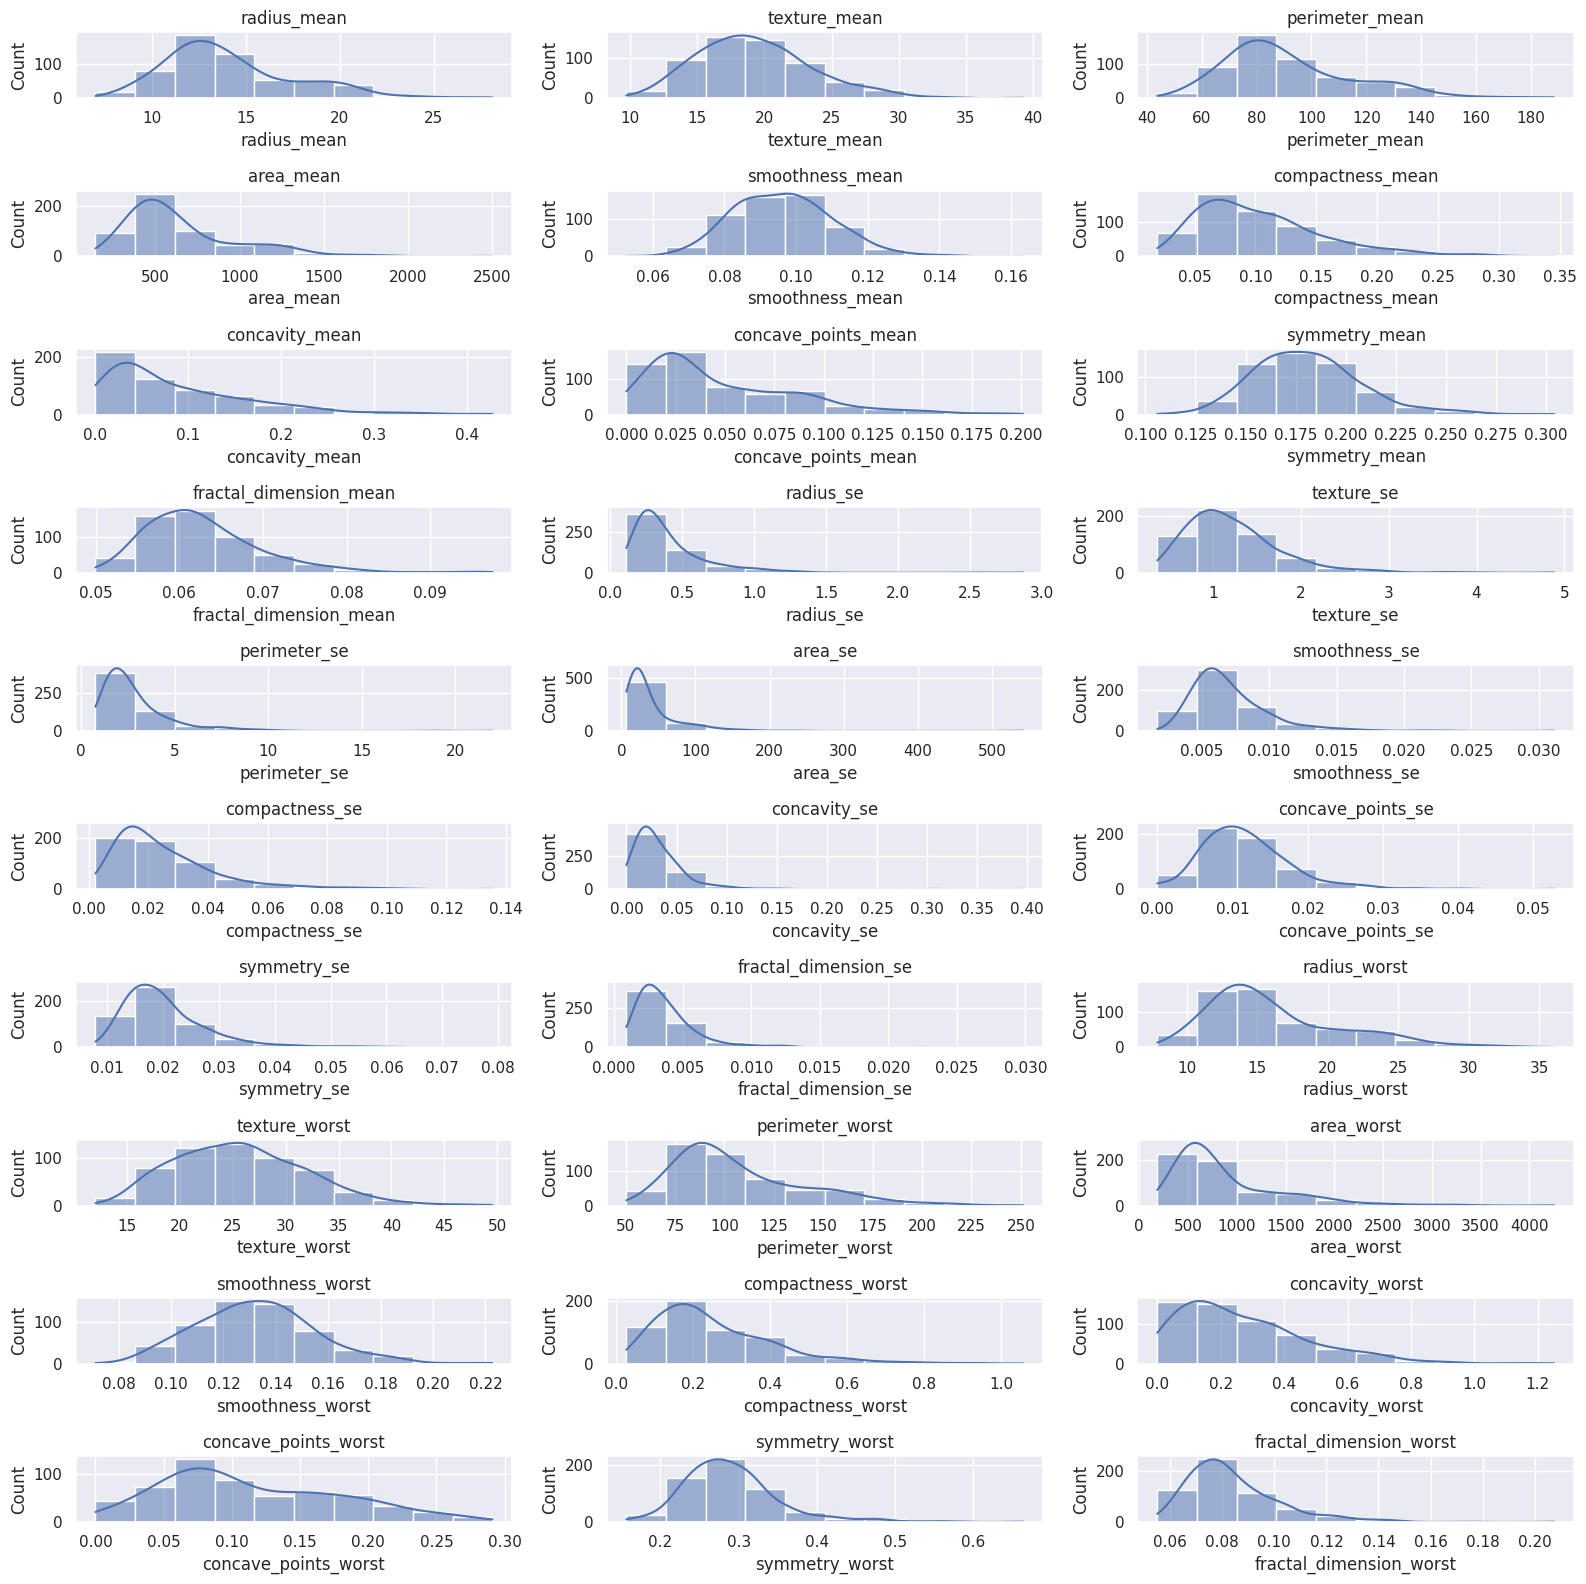

In [150]:
columns_to_plot = df.select_dtypes(include=['number']).columns.tolist()
# Create subplots
fig, axes = plt.subplots(10, 3, figsize=(16,16))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(
        df[col],
        kde=True,
        bins=10,
        palette="Pastel1",
        ax=axes[i]
    )
    axes[i].set_title(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [151]:
numerical_columns = df.select_dtypes(include=['number']).columns

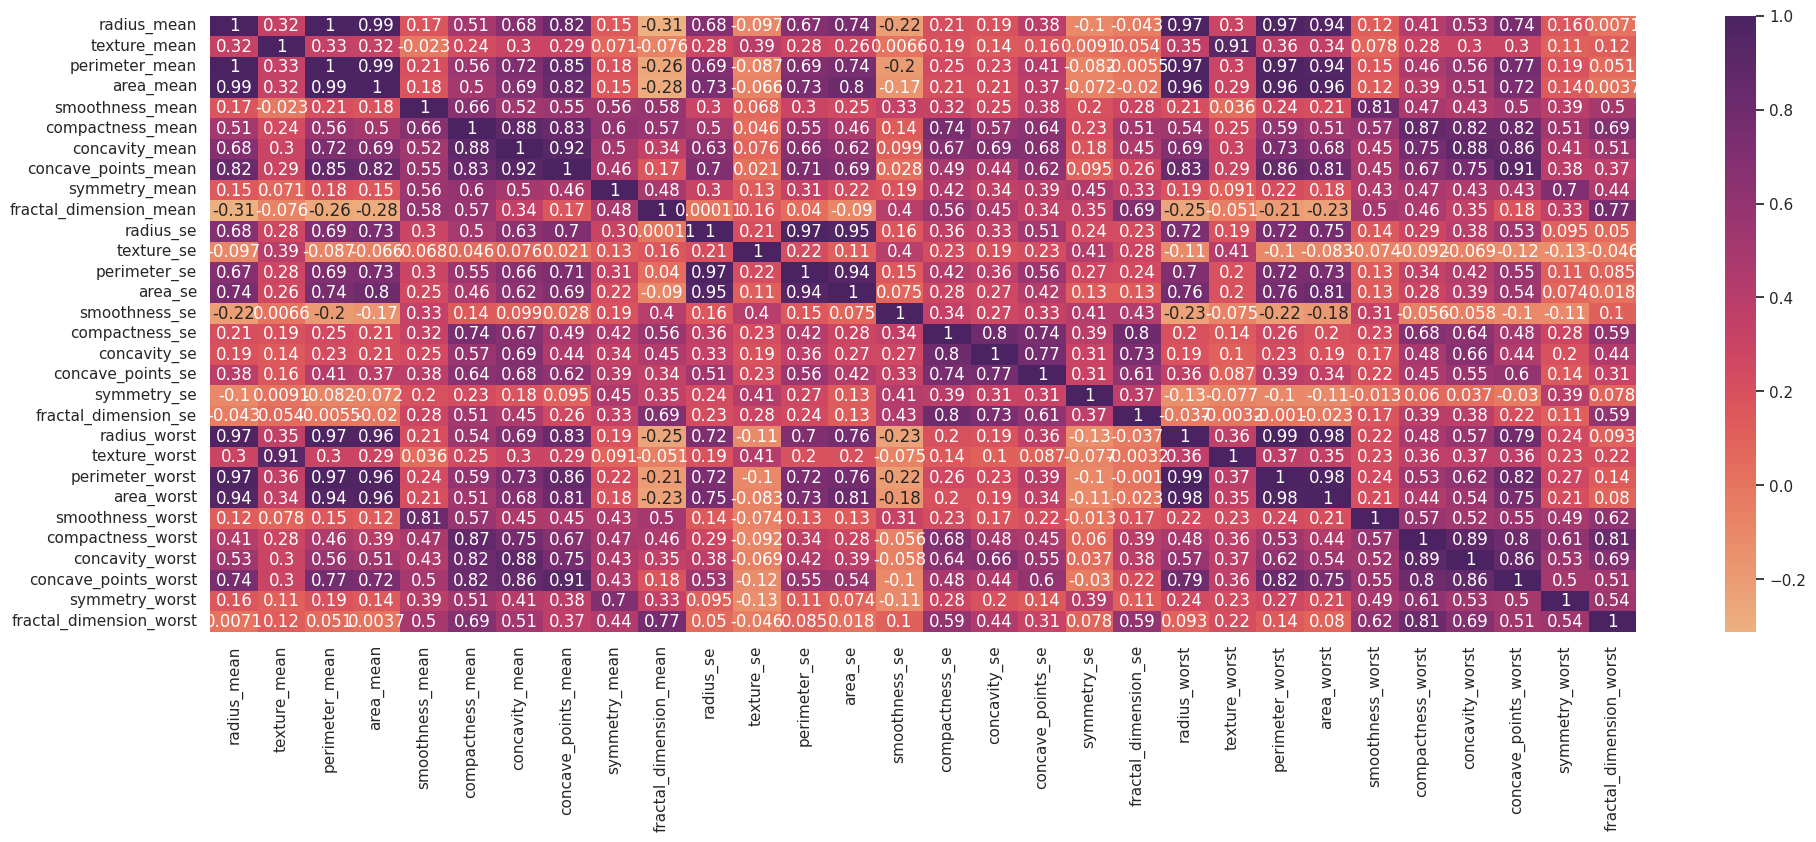

In [152]:
plt.figure(figsize=(23,8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='flare' )
plt.show()

#### Mutual Information

Mutual Information (MI) measures the dependency between two variables. It is a non-linear statistical measure that quantifies how much knowing one variable reduces uncertainty about the other. It is especially useful for feature selection in machine learning.

In the context of mutual_info_classif, MI evaluates the dependency between input features (X) and a target variable (Y) for classification tasks.

<Axes: >

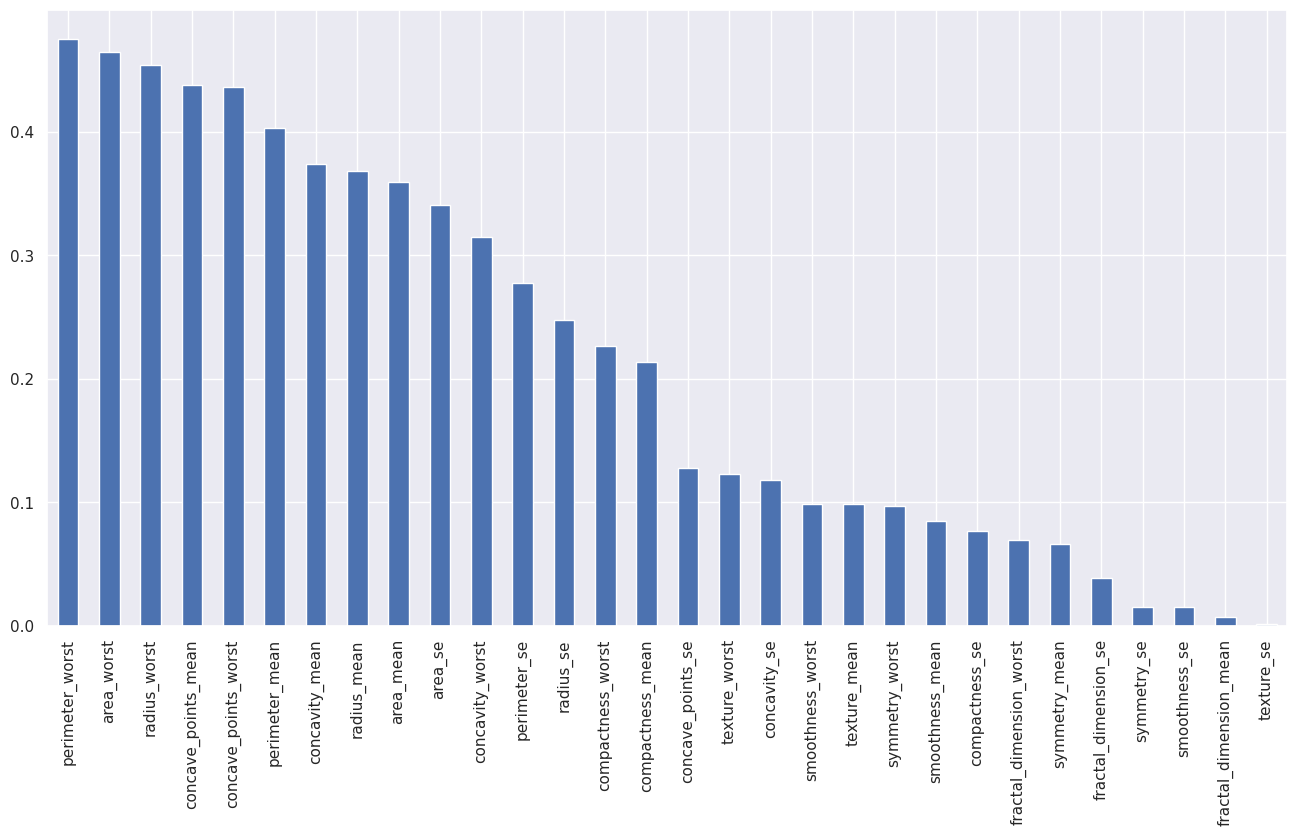

In [153]:
mi_score = mutual_info_classif(df[numerical_columns],df['diagnosis'])
mi_score = pd.Series(mi_score)
mi_score.index = df[numerical_columns].columns
mi_score.sort_values(ascending=False).plot.bar(figsize=(16,8))

In [154]:
def print_correlation_heatmap(confusion_matrix):
  plt.figure(figsize=(8,6))
  sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  plt.title("Confusion Matrix")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [155]:
train_data,test_data,train_label,test_label = train_test_split(df[numerical_columns], df['diagnosis'],test_size=0.2, random_state=0)

In [156]:
print("train_data : ",train_data.shape)
print("train_label : ",train_label.shape)
print("test_data : ",test_data.shape)
print("test_label : ",test_label.shape)

train_data :  (455, 30)
train_label :  (455,)
test_data :  (114, 30)
test_label :  (114,)


In [157]:
sc = StandardScaler()
train_data_sc = sc.fit_transform(train_data)  # Fit on training data
test_data_sc = sc.transform(test_data)        # Transform test data

In [158]:
train_data_sc

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [159]:
pc = PCA()
train_data_sc_pc = pc.fit_transform(train_data_sc)
test_data_sc_pc = pc.transform(test_data_sc)

In [160]:
train_data_sc_pc

array([[-3.03916063e+00,  1.10667018e+00,  4.08519516e-01, ...,
         7.43268972e-03,  1.05120701e-03,  9.08465396e-03],
       [-2.28231395e+00,  4.00452077e-01,  2.63274871e-01, ...,
         3.41709080e-02,  4.06970127e-02,  4.08830064e-03],
       [-1.08409511e+00, -1.99544414e+00, -1.19353587e+00, ...,
         9.87227644e-03,  3.21511692e-03, -1.20811184e-03],
       ...,
       [-3.17046065e+00,  5.16008699e-01,  5.23623024e-01, ...,
         3.84486447e-02,  4.10110351e-02,  1.43153758e-02],
       [-5.61104565e+00, -5.38804839e-01,  4.12744819e+00, ...,
         1.79056446e-02,  1.47338761e-02,  5.37434988e-03],
       [-1.01637063e+00,  1.39535217e+00,  1.33922426e+00, ...,
        -1.43399407e-02, -1.19879559e-04, -1.16840650e-02]])

In [161]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [4.34307675e-01 1.97401146e-01 9.35177070e-02 6.67766058e-02
 5.64245165e-02 4.07161938e-02 2.14925398e-02 1.51269268e-02
 1.39676264e-02 1.16009156e-02 1.01216224e-02 8.97175303e-03
 7.71439121e-03 5.55309643e-03 3.11522438e-03 2.64580181e-03
 1.99647487e-03 1.70618303e-03 1.50414589e-03 1.06143766e-03
 9.94608221e-04 8.78454935e-04 7.24281209e-04 5.81085817e-04
 5.46645369e-04 2.61499457e-04 2.16152203e-04 4.62504070e-05
 2.53207432e-05 3.71910834e-06]


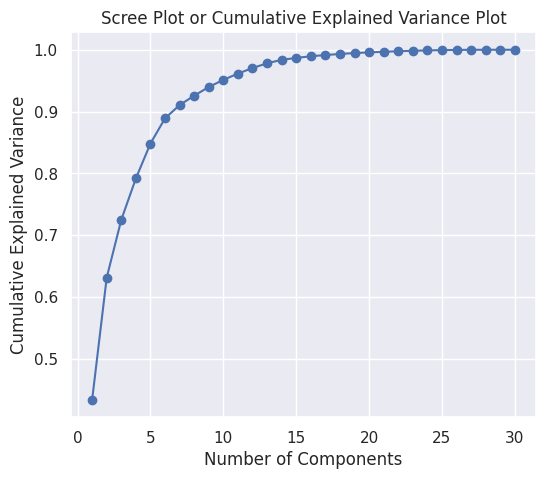

In [162]:
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), cumulative_variance,marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot or Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [163]:
 cumulative_variance = np.cumsum(explained_variance)
 desired_variance = 0.95 # 95% variance to capture
 num_components = np.argmax(cumulative_variance >= desired_variance) + 1
 print(f"\nNumber of components selected: {num_components}")


Number of components selected: 10


In [164]:
 pc = PCA(n_components=10)
 train_data_sc_pc = pc.fit_transform(train_data_sc)
 test_data_sc_pc = pc.transform(test_data_sc)

In [165]:
explained_variance = pc.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.43430767 0.19740115 0.09351771 0.06677661 0.05642452 0.04071619
 0.02149254 0.01512693 0.01396763 0.01160092]


In [166]:
label_encoder = LabelEncoder()
train_label_encoded = label_encoder.fit_transform(train_label)
test_label_encoded = label_encoder.fit_transform(test_label)

In [167]:
train_label.head()

,diagnosis
id,
897880,B
90745,B
905189,B
86211,B
91376701,B


In [168]:
train_label_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [169]:
accuracy_results = {}

### Random Forest Model

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': False, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Training Accuracy: 0.9626902521203672
Test Accuracy RF: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



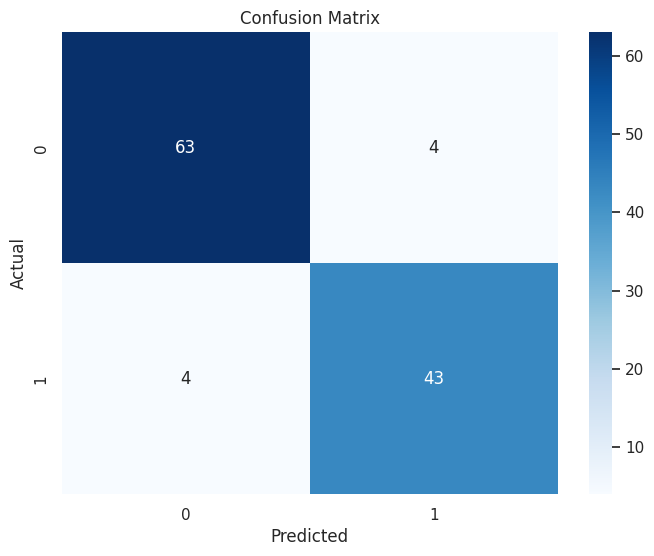

In [170]:
# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=1)
grid_search_rf.fit(train_data_sc_pc, train_label_encoded)

# Print best parameters and best score
print("Best Parameters:", grid_search_rf.best_params_)
print("Training Accuracy:", grid_search_rf.best_score_)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(test_data_sc_pc)

# Calculate error and accuracy of the model
test_accuracy_rf = accuracy_score(test_label_encoded, y_pred_rf)
print(f"Test Accuracy RF: {test_accuracy_rf}")

# Print the classification report
print(classification_report(test_label_encoded, y_pred_rf))

# Confusion matrix
rf_confusion_matrix = confusion_matrix(test_label_encoded, y_pred_rf)
print_correlation_heatmap(rf_confusion_matrix)

In [171]:
print(classification_report(y_pred_rf,test_label_encoded))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        67
           1       0.91      0.91      0.91        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [172]:
accuracy_results["RF"] = test_accuracy_rf

### Decision Tree Model

Apply Grid Search CV for hyperparameter tuning

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
Training Accuracy: 0.938523875914953
Test Accuracy DT: 0.9385964912280702
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



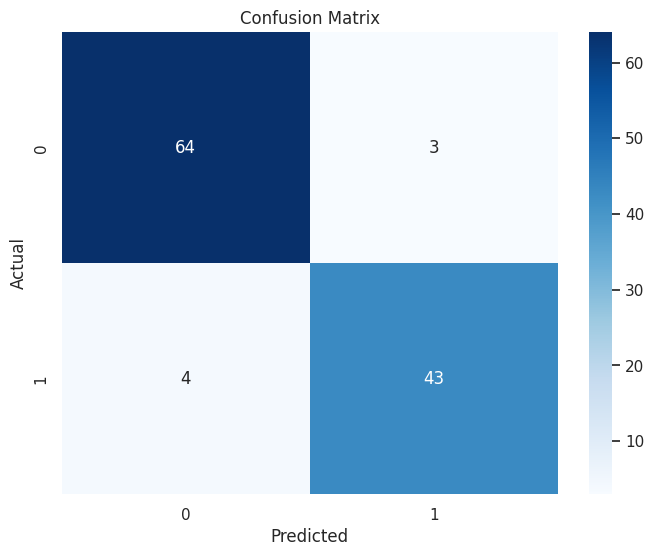

In [173]:
# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=3, scoring='accuracy', verbose=1)
grid_search_dt.fit(train_data_sc_pc, train_label_encoded)

# Print best parameters and best score
print("Best Parameters:", grid_search_dt.best_params_)
print("Training Accuracy:", grid_search_dt.best_score_)

# Get the best model from grid search
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(test_data_sc_pc)

# Calculate error and accuracy of the model
test_accuracy_dt = accuracy_score(test_label_encoded, y_pred_dt)
print(f"Test Accuracy DT: {test_accuracy_dt}")

# Print the classification report
print(classification_report(test_label_encoded, y_pred_dt))

# Confusion matrix
dt_confusion_matrix = confusion_matrix(test_label_encoded, y_pred_dt)
print_correlation_heatmap(dt_confusion_matrix)

In [174]:
print(classification_report(y_pred_dt,test_label_encoded))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.91      0.93      0.92        46

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [175]:
accuracy_results["DT"] = test_accuracy_dt

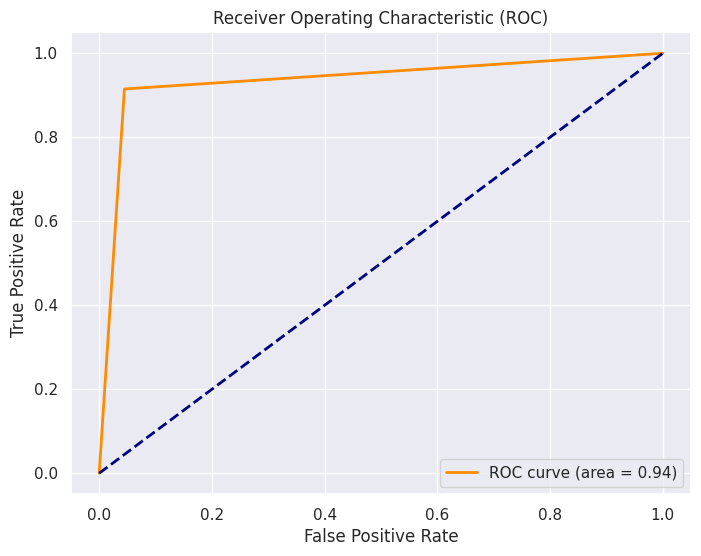

In [176]:
fpr, tpr, thresholds = roc_curve(test_label_encoded, y_pred_dt)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### KNN Model

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Training Accuracy: 0.9582752410828395
Test Accuracy KNN: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        67
           1       0.98      0.89      0.93        47

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



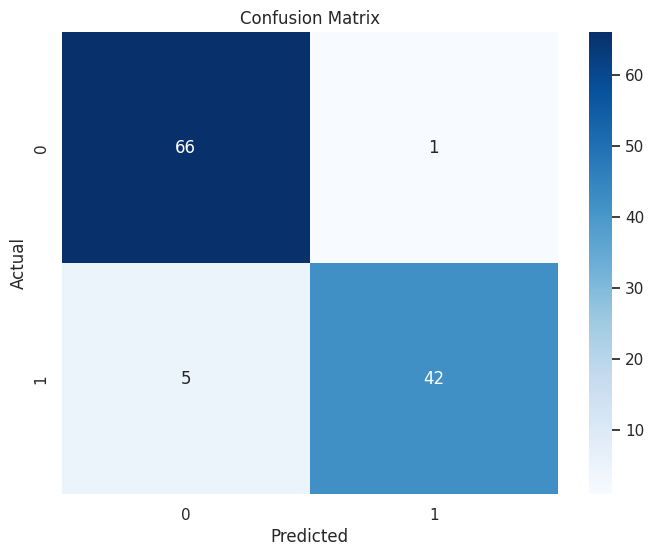

In [177]:
# Define the KNN model
knn_model = KNeighborsClassifier()

# Define hyperparameters for tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [20, 30, 40]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=3, scoring='accuracy', verbose=1)
grid_search_knn.fit(train_data_sc_pc, train_label_encoded)

# Print best parameters and best score
print("Best Parameters:", grid_search_knn.best_params_)
print("Training Accuracy:", grid_search_knn.best_score_)

# Get the best model from grid search
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(test_data_sc_pc)

# Calculate error and accuracy of the model
test_accuracy_knn = accuracy_score(test_label_encoded, y_pred_knn)
print(f"Test Accuracy KNN: {test_accuracy_knn}")

# Print the classification report
print(classification_report(test_label_encoded, y_pred_knn))

# Confusion matrix
knn_confusion_matrix = confusion_matrix(test_label_encoded, y_pred_knn)
print_correlation_heatmap(knn_confusion_matrix)

In [178]:
accuracy_results["KNN"] = test_accuracy_knn

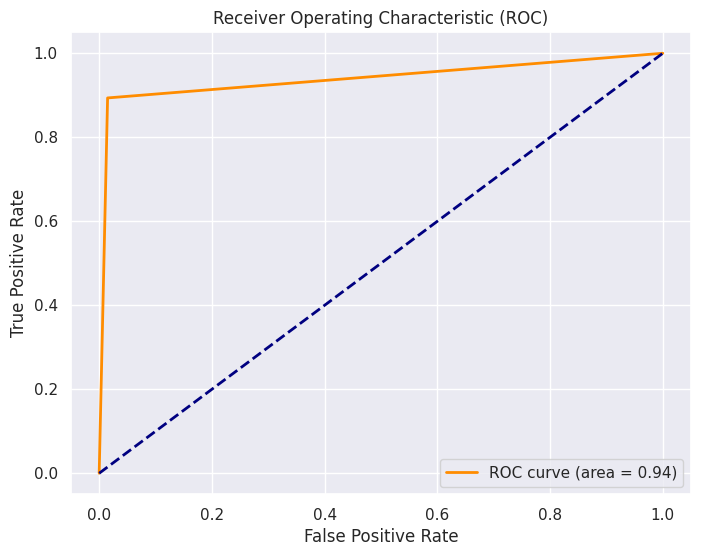

In [179]:
fpr, tpr, thresholds = roc_curve(test_label_encoded, y_pred_knn)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### XGBoost Model

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Training Accuracy: 0.9604827466016034
Test Accuracy XG : 0.956140350877193
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



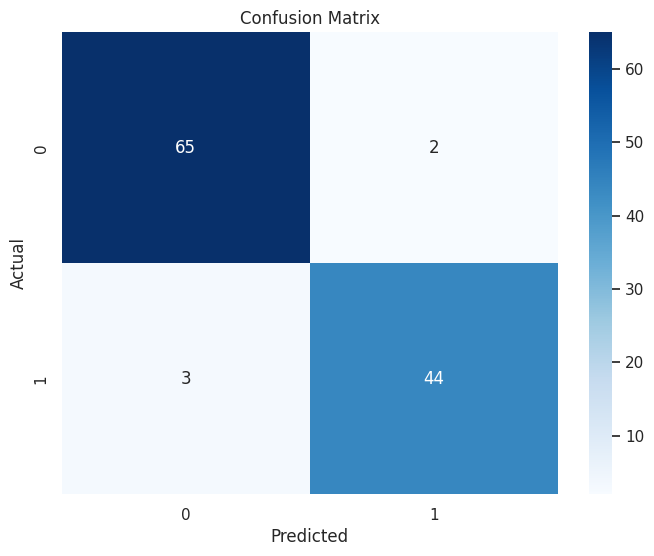

In [180]:
# Define the XGBoost model
xgb_model = XGBClassifier()

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search_xgb.fit(train_data_sc_pc, train_label_encoded)

# Print best parameters and best score
print("Best Parameters:", grid_search_xgb.best_params_)
print("Training Accuracy:", grid_search_xgb.best_score_)


# Get the best model from grid search
best_xg_model = grid_search_xgb.best_estimator_

# Make predictions on the test set
y_pred_xgb = best_xg_model.predict(test_data_sc_pc)

# Calculate error and accuracy of the model
test_accuracy_xgb= accuracy_score(test_label_encoded, y_pred_xgb)

print(f"Test Accuracy XG : {test_accuracy_xgb}")

print(classification_report(test_label_encoded, y_pred_xgb))

xgboost_confusion_matrix = confusion_matrix(test_label_encoded, y_pred_xgb)
print_correlation_heatmap(xgboost_confusion_matrix)

In [181]:
accuracy_results["XG Boost"] = test_accuracy_xgb

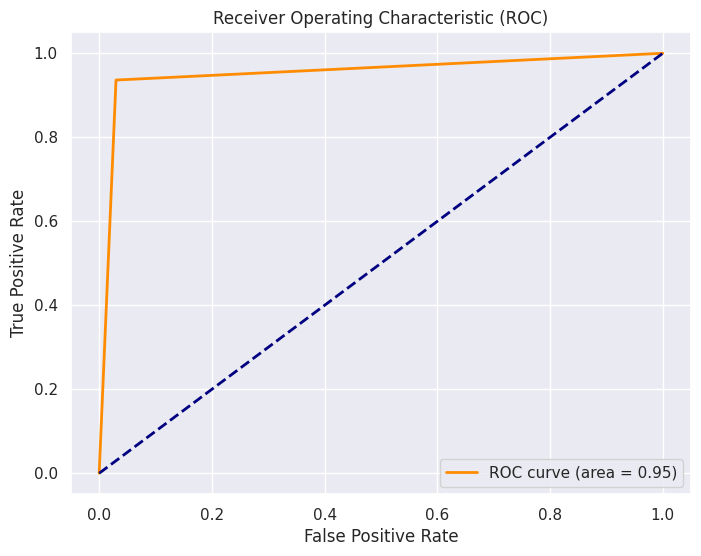

In [182]:
 fpr, tpr, thresholds = roc_curve(test_label_encoded, y_pred_xgb)
 # Calculate the Area Under the Curve (AUC)
 roc_auc = auc(fpr, tpr)
 # Plot ROC curve
 plt.figure(figsize=(8, 6))
 plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
 plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic (ROC)')
 plt.legend(loc='lower right')
 plt.show()

### Logistic Regression

In [183]:
lr_model = LogisticRegression(random_state=42)
# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
param_grid = [
  {'penalty' : ['l1', 'l2'],
  'C' : np.logspace(-4, 4, 20),
  'solver' : [ 'liblinear', 'saga'],
  'max_iter' : [10, 50, 100]
  }
]

# Create GridSearchCV object
grid_search = GridSearchCV( estimator = lr_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit the model
grid_search.fit(train_data_sc_pc, train_label_encoded)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [10, 50, 100], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             verbose=True)

Best Parameters: {'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Training Accuracy: 0.9780556523759731
Logistic Regression Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



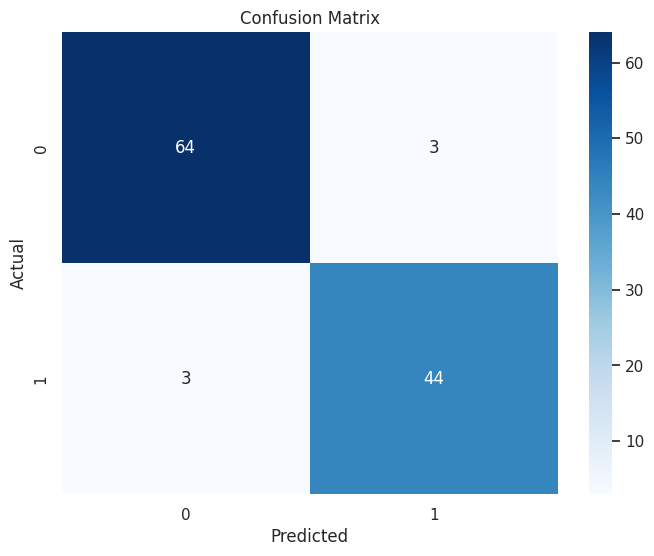

In [184]:
# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Training Accuracy:",grid_search.best_score_)

# Get the best model from grid search
best_lr_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_lr = best_lr_model.predict(test_data_sc_pc)

# Calculate error and accuracy of the model
test_accuracy_lr = accuracy_score(test_label_encoded, y_pred_lr)

print(f"Logistic Regression Accuracy: {test_accuracy_lr}")

print(classification_report(test_label_encoded, y_pred_lr))


_logistic_confusion_matrix = confusion_matrix(test_label_encoded, y_pred_lr)
print_correlation_heatmap(_logistic_confusion_matrix)

In [185]:
accuracy_results["Logistic Regression "] = test_accuracy_lr

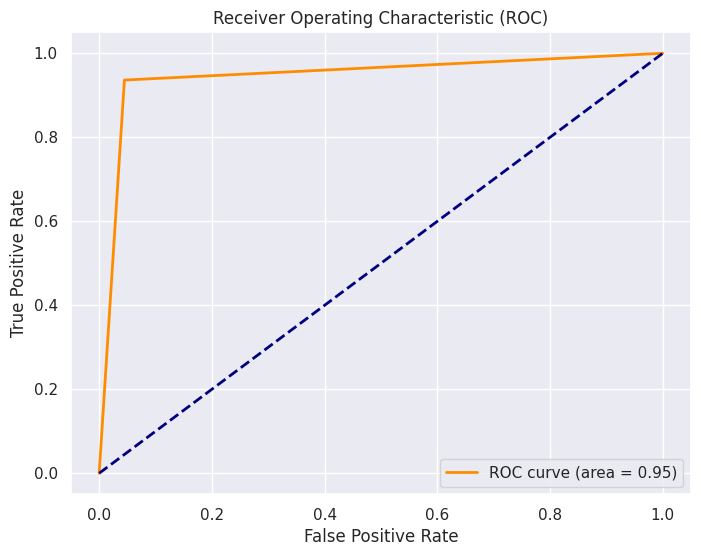

In [186]:
fpr, tpr, thresholds = roc_curve(test_label_encoded, y_pred_lr)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Support Vector Machine (SVM) Classifier

In [187]:
svc_model = SVC(random_state=45)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Define parameter grid for SVC
param_grid = [
  {
      'C': np.logspace(-4, 4, 20),  # Regularization parameter
      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
      'gamma': ['scale', 'auto'],  # Kernel coefficient
      'max_iter': [500, 1000, 1500]  # Max iterations for convergence
  }
]

# Create GridSearchCV object
grid_search_svc = GridSearchCV(estimator = svc_model, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)

# Fit the model
grid_search_svc.fit(train_data_sc_pc, train_label_encoded)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=SVC(random_state=45), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                          'max_iter': [500, 1000, 1500]}],
             verbose=True)

Best Parameters: {'C': 0.615848211066026, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': 1000}
Training Accuracy: 0.9780556523759731
SVC Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



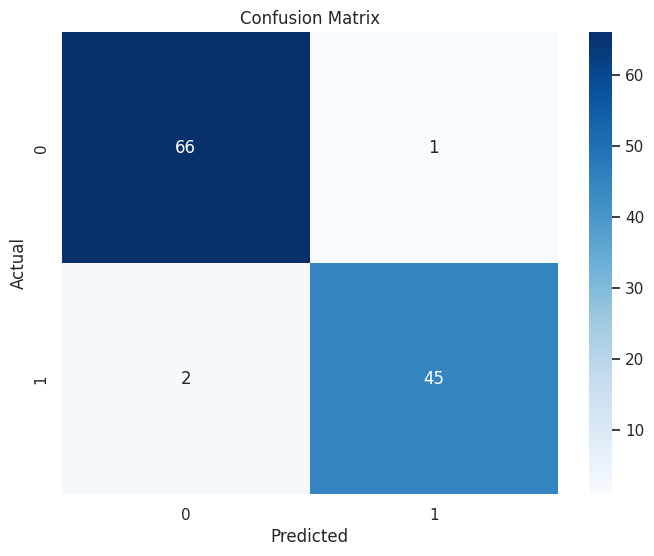

In [188]:


# Print best parameters and best score
print("Best Parameters:", grid_search_svc.best_params_)
print("Training Accuracy:", grid_search_svc.best_score_)

# Get the best model from grid search
best_svm_model = grid_search_svc.best_estimator_

# Make predictions on the test set
y_pred_svm = best_svm_model.predict(test_data_sc_pc)

# Calculate error and accuracy of the model
test_accuracy_svm = accuracy_score(test_label_encoded, y_pred_svm)

print(f"SVC Accuracy: {test_accuracy_svm}")
print(classification_report(test_label_encoded, y_pred_svm))

# Confusion matrix visualization
svc_confusion_matrix = confusion_matrix(test_label_encoded, y_pred_svm)
print_correlation_heatmap(svc_confusion_matrix)

In [189]:
accuracy_results["SVM "] = test_accuracy_svm

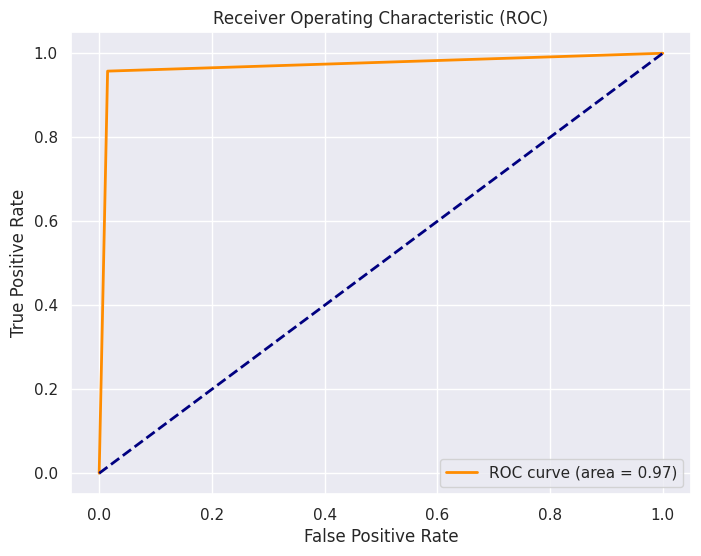

In [190]:
fpr, tpr, thresholds = roc_curve(test_label_encoded, y_pred_svm)
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Comparison of Classification Model Accuracies')

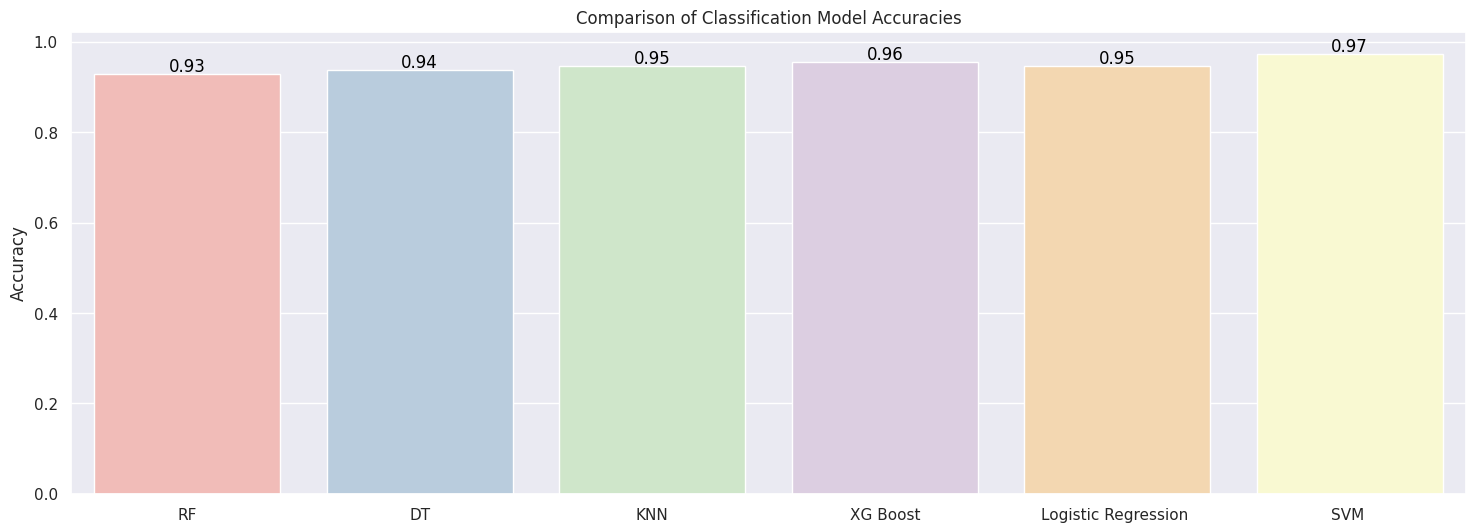

In [191]:
model_names = list(accuracy_results.keys())
accuracy_values = list(accuracy_results.values())
# Plotting the accuracy results using a different style
# Plotting the accuracy results using a Seaborn barplot
# Create the bar plot
plt.figure(figsize=(18, 6))
ax = sns.barplot(x=model_names, y=accuracy_values, palette='Pastel1')

# Add the value annotations on top of the bars
for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}',
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center',
              fontsize=12, color='black',
              xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Model Accuracies')

# Show the plot